# Requerimientos 

### librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap

# Configuración visual
plt.style.use("seaborn-v0_8")

c:\Users\agabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Datos


### datos de t-sne


In [3]:
#cargar datos

df = pd.read_csv("../data/data.csv")
print("Shape:", df.shape)

Shape: (569, 33)


In [4]:
#limpieza 
# Eliminar columnas inecesarias
df = df.dropna(axis=1, how="all")
df = df.drop(columns=["id"])

# Convertir diagnosis a numérica (UNA sola vez)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

print("NaN totales:", df.isnull().sum().sum())

NaN totales: 0


In [5]:
#separar variables
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

print("Dimensión X:", X.shape)

Dimensión X: (569, 30)


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
df_tsne["diagnosis"] = y.reset_index(drop=True)

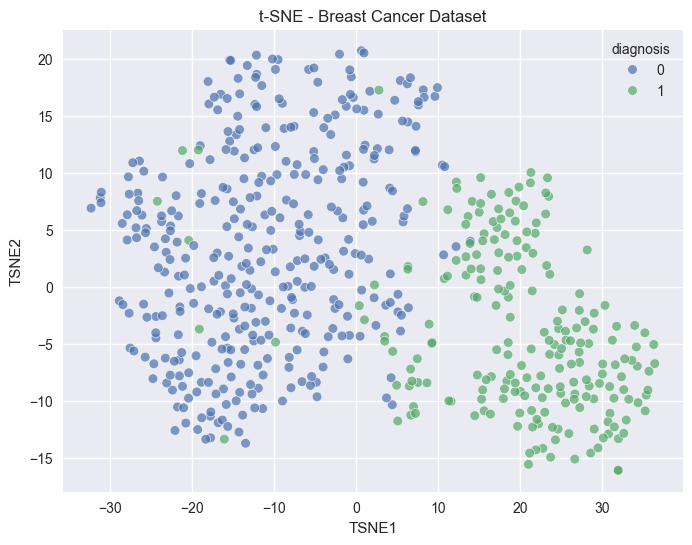

In [9]:
#grafica
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df_tsne,
    x="TSNE1",
    y="TSNE2",
    hue="diagnosis",
    alpha=0.7
)

plt.title("t-SNE - Breast Cancer Dataset")
plt.show()

### datos de UMAP

In [10]:

reducer = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

X_umap = reducer.fit_transform(X_scaled)

c:\Users\agabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [11]:
df_umap = pd.DataFrame(X_umap, columns=["UMAP1", "UMAP2"])
df_umap["diagnosis"] = y.reset_index(drop=True)

df_umap.head()

,UMAP1,UMAP2,diagnosis
0,3.531133,20.941025,1
1,4.748974,18.936058,1
2,3.838274,20.453783,1
3,1.658038,19.458605,1
4,5.190611,19.612881,1


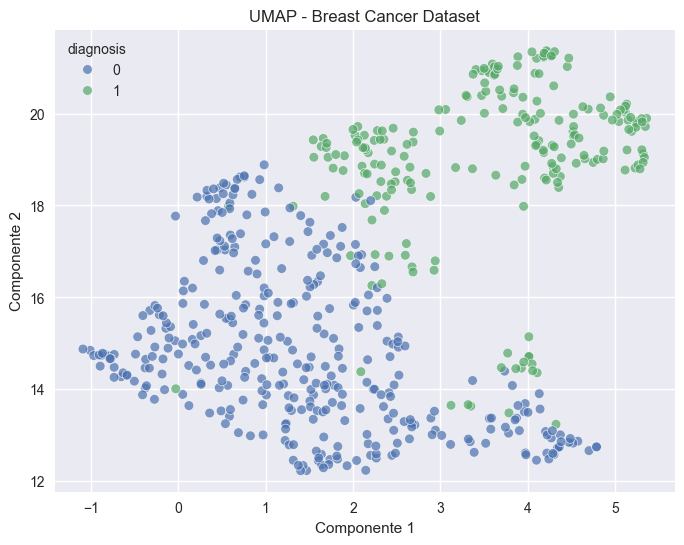

In [12]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df_umap,
    x="UMAP1",
    y="UMAP2",
    hue="diagnosis",
    alpha=0.7
)

plt.title("UMAP - Breast Cancer Dataset")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()